# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf


# Data Collection

In [2]:
symbol='AXISBANK.NS'
start=dt.datetime(2021,7,1)
end=dt.datetime(2022,1,28)
stk_data=yf.download(symbol,start=start,end=end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
stk_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-01,750.000000,754.400024,744.500000,746.450012,744.555725,5695690
2021-07-02,747.599976,752.849976,744.000000,750.650024,748.745117,3557647
2021-07-05,757.099976,762.000000,753.400024,760.349976,758.420410,4680089
2021-07-06,757.000000,767.000000,755.200012,758.349976,756.425476,5529485
2021-07-07,755.900024,764.000000,752.250000,762.900024,760.963989,3573368
...,...,...,...,...,...,...
2022-01-20,731.049988,737.150024,722.150024,728.900024,727.050232,8505400
2022-01-21,722.000000,725.250000,708.049988,712.500000,710.691895,10689060
2022-01-24,715.000000,716.400024,688.200012,704.599976,702.811890,8812501


In [4]:
stk_data=stk_data[["Open","High","Low","Close"]]

In [5]:
stk_data

,Open,High,Low,Close
Date,,,,
2021-07-01,750.000000,754.400024,744.500000,746.450012
2021-07-02,747.599976,752.849976,744.000000,750.650024
2021-07-05,757.099976,762.000000,753.400024,760.349976
2021-07-06,757.000000,767.000000,755.200012,758.349976
2021-07-07,755.900024,764.000000,752.250000,762.900024
...,...,...,...,...
2022-01-20,731.049988,737.150024,722.150024,728.900024
2022-01-21,722.000000,725.250000,708.049988,712.500000
2022-01-24,715.000000,716.400024,688.200012,704.599976


# Data Preprocessing

In [6]:

from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
data1=ms.fit_transform(stk_data)
print("Length : ",data1.shape)


Length :  (144, 4)


In [7]:
data1

array([[0.50898197, 0.44154881, 0.54381512, 0.49149503],
       [0.49700581, 0.43385435, 0.54099743, 0.51314458],
       [0.54441099, 0.47927516, 0.59397023, 0.56314433],
       [0.54391211, 0.50409522, 0.60411386, 0.55283505],
       [0.53842321, 0.48920319, 0.58748939, 0.57628891],
       [0.55888217, 0.50483994, 0.58439   , 0.53247448],
       [0.51896201, 0.43410279, 0.51986471, 0.49613402],
       [0.52145702, 0.45842626, 0.56522953, 0.52835052],
       [0.55389215, 0.53387928, 0.60298672, 0.6167527 ],
       [0.61352294, 0.53611315, 0.65370522, 0.61314439],
       [0.61127737, 0.55994034, 0.6677937 , 0.6342786 ],
       [0.63872248, 0.54877131, 0.6680754 , 0.61881468],
       [0.52045896, 0.50235794, 0.57255547, 0.53659813],
       [0.53393207, 0.44551995, 0.54212457, 0.48788672],
       [0.50948085, 0.46190113, 0.52409126, 0.49304136],
       [0.50399195, 0.48920319, 0.51901927, 0.53762912],
       [0.52894205, 0.46934714, 0.54663282, 0.5422681 ],
       [0.51147698, 0.4494911 ,

# Creating dataframe for processed values

In [8]:
data1=pd.DataFrame(data1,columns=["Open","High","Low","Close"])

In [9]:
data1.shape

(144, 4)

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:

# creating list
listt=["Close","High","Open","Low"]

In [12]:
print(listt)

['Close', 'High', 'Open', 'Low']


# Model creation and Forecasting

In [20]:
datasetTwo = data1[listt]
test_obs = 28
train = datasetTwo[:-test_obs]
test = datasetTwo[-test_obs:]

In [14]:
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error


def combination(dataset, listt):
    print(listt)
    datasetTwo = dataset[listt]
    test_obs = 28
    train = datasetTwo[:-test_obs]
    test = datasetTwo[-test_obs:]

    # Initialize lists to store performance metrics
    rmse_list = []
    mape_list = []
    lag_list = []

    for p in range(1, 3):  # Iterate over different autoregressive orders
        for q in range(1, 3):  # Iterate over different moving average orders
            try:
                model = VARMAX(endog=train, exog=None, order=(p, q), 
                                trend='c', error_cov_type='unstructured', enforce_stationarity=True)  # VARMA model
                result = model.fit(maxiter=1000, disp=False)

                print('Order = (p={}, q={})'.format(p, q))
                print('AIC: ', result.aic)
                print('BIC: ', result.bic)
                print()

                # Forecast
                pred = result.forecast(steps=28)

                # Calculate performance metrics
                rmse = round(mean_squared_error(test, pred, squared=False))
                mape = mean_absolute_percentage_error(test, pred)

                # Append metrics to lists
                rmse_list.append(rmse)
                mape_list.append(mape)
                lag_list.append((p, q))
            except Exception as e:
                print(f"Error fitting model for order (p={p}, q={q}): {e}")

    # Check if rmse_list is empty
    if not rmse_list:
        print("No suitable models found.")
        return None, None, None

    
    # Find the best performing model based on RMSE
    min_rmse_index = rmse_list.index(min(rmse_list))
    best_lag = lag_list[min_rmse_index]
    best_rmse = rmse_list[min_rmse_index]
    best_mape = mape_list[min_rmse_index]

    print('Best Model (based on RMSE):')
    print('Order (p, q):', best_lag)
    print('RMSE:', best_rmse)
    print('MAPE:', best_mape)

    # Fit the best model
    best_model =  model = VARMAX(endog=train, exog=None, order=(p, q), trend='c', error_cov_type='unstructured', enforce_stationarity=True)
    best_result = best_model.fit(maxiter=1000, disp=False)

    # Forecast using the best model
    best_pred = best_result.forecast(steps=28)

    # Save forecast to CSV
    preds = pd.DataFrame(best_pred, columns=listt)
    #preds.to_csv("varma_forecasted_{}.csv".format(test_obs))

    # Create DataFrame to store performance metrics
    performance = pd.DataFrame({
        'Model': [listt],
        'RMSE': [best_rmse],
        'MAPE': [best_mape],
        'Lag': [best_lag],
        'Test': [test_obs]
    })

    return performance, best_result, best_pred


In [15]:
perf,best_res,best_pre=combination(data1, listt)

['Close', 'High', 'Open', 'Low']


C:\Users\ELCOT\anaconda3\envs\aidata\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\ELCOT\anaconda3\envs\aidata\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order = (p=1, q=1)
AIC:  -1893.9271224753036
BIC:  -1767.2619736844108



C:\Users\ELCOT\anaconda3\envs\aidata\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Order = (p=1, q=2)
AIC:  -1899.2379812015947
BIC:  -1728.515389353



C:\Users\ELCOT\anaconda3\envs\aidata\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Order = (p=2, q=1)
AIC:  -1904.9649344951054
BIC:  -1734.2423426465107



C:\Users\ELCOT\anaconda3\envs\aidata\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Order = (p=2, q=2)
AIC:  -1876.5831601681593
BIC:  -1661.803125261863

Best Model (based on RMSE):
Order (p, q): (1, 1)
RMSE: 0
MAPE: 0.6302594382526286


C:\Users\ELCOT\anaconda3\envs\aidata\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


In [16]:
perf

,Model,RMSE,MAPE,Lag,Test
0,"[Close, High, Open, Low]",0,0.630259,"(1, 1)",28


In [17]:
best_res

In [18]:
best_pre

,Close,High,Open,Low
116,0.163710,0.145592,0.208020,0.158282
117,0.168109,0.134849,0.187159,0.148662
118,0.179670,0.139884,0.187519,0.171844
119,0.196092,0.154363,0.198604,0.190329
120,0.212658,0.167416,0.213039,0.209027
121,0.227768,0.182486,0.228706,0.226632
122,0.242915,0.196492,0.242966,0.243539
123,0.257837,0.210748,0.257593,0.259480
124,0.272199,0.224700,0.271873,0.275294
125,0.286114,0.238379,0.285742,0.290312


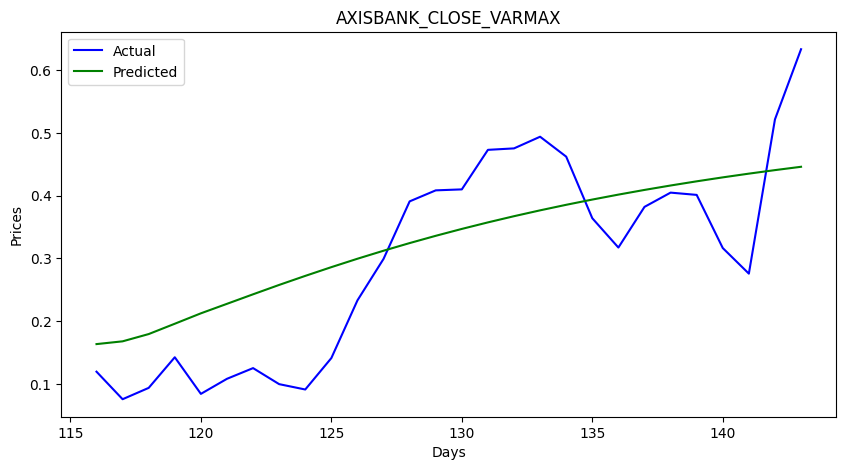

In [21]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(test['Close'], color = 'blue', label="Actual")
plt.plot(best_pre['Close'], color = 'green', label ="Predicted")
plt.title("AXISBANK_CLOSE_VARMAX")
plt.xlabel("Days")
plt.ylabel("Prices")
plt.legend()
plt.show()

In [24]:
forecast = best_res.predict(start=len(data1), end=len(data1) + 3, exog=test[:4])
forecast

,Close,High,Open,Low
144,0.450747,0.403319,0.453770,0.466389
145,0.455475,0.408083,0.458623,0.471430
146,0.459941,0.412584,0.463207,0.476192
147,0.464159,0.416835,0.467537,0.480691
